In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import warnings
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('allgames_stats.csv')

In [3]:
df.head()

,G,Date,Tm,X,Opp,Result,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Player,RSorPO
0,1,1996-11-03,LAL,NaN,MIN,W,0,6:00,0.0,1.0,...,1,0,0.0,1.0,1,1,0.0,-1.1,Kobe Bryant,Regular Season
1,2,1996-11-05,LAL,@,NYK,W,0,3:00,0.0,1.0,...,0,0,0.0,0.0,1,0,1.0,-1.1,Kobe Bryant,Regular Season
2,3,1996-11-06,LAL,@,CHH,L,0,7:00,2.0,3.0,...,0,0,0.0,0.0,3,0,5.0,0.7,Kobe Bryant,Regular Season
3,4,1996-11-08,LAL,@,TOR,L,0,17:00,3.0,8.0,...,3,0,0.0,1.0,0,3,10.0,5.2,Kobe Bryant,Regular Season
4,5,1996-11-10,LAL,NaN,ATL,W,0,8:00,0.0,3.0,...,3,1,0.0,0.0,0,0,2.0,1.9,Kobe Bryant,Regular Season


In [4]:
#通过科比对战爵士的比赛 用linear regression来predict他之后的GmSc值 来判断他是否需要重点防守

In [5]:
a=df.loc[(df['Tm']=='LAL')&(df['Opp']=='UTA')&(df['Player']=='Kobe Bryant')]

In [6]:
a.corr()

,G,GS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
G,1.000000,0.083891,-0.035025,0.096739,-0.235424,0.102207,0.161331,-0.034763,-0.102366,-0.075466,...,0.207042,-0.239827,-0.150734,-0.007356,0.145185,-0.074948,-0.102790,-0.180160,-0.054515,-0.087613
GS,0.083891,1.000000,0.564557,0.601415,0.032679,0.226484,0.215355,0.204065,0.332572,0.341648,...,0.140270,0.496402,0.514006,0.412587,0.269708,-0.093027,0.311688,0.231149,0.587045,0.530652
FG,-0.035025,0.564557,1.000000,0.834989,0.358371,0.458629,0.428350,0.356477,0.282743,0.317487,...,-0.027557,0.425355,0.387966,0.241068,0.213775,0.104856,0.222677,0.150508,0.919650,0.840216
FGA,0.096739,0.601415,0.834989,1.000000,-0.093182,0.429502,0.621313,0.202642,0.357530,0.378887,...,0.239903,0.389012,0.448969,0.164788,0.214780,-0.016014,0.130783,0.180616,0.825138,0.615351
FG%,-0.235424,0.032679,0.358371,-0.093182,1.000000,0.097300,-0.205699,0.363046,-0.071841,-0.051777,...,-0.339390,0.149156,0.018944,0.135380,-0.005590,0.175674,0.184599,0.014529,0.247862,0.395999
3P,0.102207,0.226484,0.458629,0.429502,0.097300,1.000000,0.750307,0.688139,-0.059052,-0.013787,...,-0.120609,-0.022501,-0.063875,-0.131809,0.102970,-0.170016,-0.001041,-0.034487,0.452140,0.338979
3PA,0.161331,0.215355,0.428350,0.621313,-0.205699,0.750307,1.000000,0.191503,-0.004167,0.036372,...,0.064447,-0.020639,0.003588,-0.076856,0.100824,-0.222674,-0.096447,-0.073812,0.418193,0.224079
3P%,-0.034763,0.204065,0.356477,0.202642,0.363046,0.688139,0.191503,1.000000,0.026264,0.043392,...,-0.183149,0.121145,0.045137,-0.139526,0.035317,-0.034724,0.016852,0.016498,0.379939,0.361216
FT,-0.102366,0.332572,0.282743,0.357530,-0.071841,-0.059052,-0.004167,0.026264,1.000000,0.977919,...,0.159449,0.267303,0.306585,0.143578,0.101969,-0.022793,0.138619,0.232445,0.618739,0.589298
FTA,-0.075466,0.341648,0.317487,0.378887,-0.051777,-0.013787,0.036372,0.043392,0.977919,1.000000,...,0.197629,0.266916,0.319782,0.166546,0.076163,-0.035030,0.100636,0.229160,0.641406,0.610560


In [7]:
features = ['PTS','AST','GmSc']
b=a[features]
b.corr()

,PTS,AST,GmSc
PTS,1.000000,0.219696,0.913408
AST,0.219696,1.000000,0.424954
GmSc,0.913408,0.424954,1.000000


In [8]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.linear_model import LinearRegression

<AxesSubplot:xlabel='AST', ylabel='GmSc'>

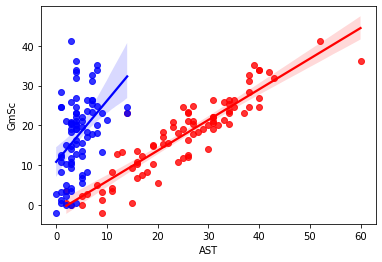

In [9]:
sns.regplot(x='PTS', y='GmSc',data=a,color='red')
sns.regplot(x='AST', y='GmSc',data=a,color='blue')


In [10]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
features=['PTS']
X = a[features]
Y = a['GmSc']
model = lm.fit(X,Y)
print(model.intercept_, model.coef_)   # y= -1.74 + 0.77*x

-1.7408570537521832 [0.77006771]


In [11]:
X

,PTS
10,11.0
15,8.0
65,11.0
67,12.0
71,23.0
...,...
1502,31.0
1527,31.0
1528,30.0
1529,35.0


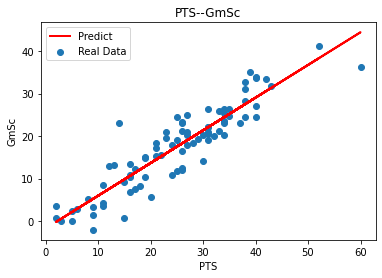

In [12]:
plt.scatter(X,Y,label='Real Data')
plt.plot(X,model.predict(X),c='Red',linewidth='2',label='Predict')
plt.legend(loc='best')
plt.title('PTS--GmSc')
plt.xlabel('PTS')
plt.ylabel('GmSc')
plt.show()

In [13]:
#to predict the GmSc with two or more features

In [14]:
features=['PTS','AST']  # two independent variables
X = a[features]
Y = a['GmSc']


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 10 to 1530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PTS     84 non-null     float64
 1   AST     84 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [16]:
Y

10       8.4
15       5.1
65       4.3
67      12.9
71      19.5
        ... 
1502    22.2
1527    21.0
1528    20.2
1529    26.5
1530    20.0
Name: GmSc, Length: 84, dtype: float64

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.8,random_state=0)
print("Independent variable:",X.shape,";  xtrain：",X_train.shape,";  xtest:",X_test.shape)
print("dependent variable：",Y.shape,";  ytrain：",Y_train.shape,";  ytest:",Y_test.shape)

Independent variable: (84, 2) ;  xtrain： (16, 2) ;  xtest: (68, 2)
dependent variable： (84,) ;  ytrain： (16,) ;  ytest: (68,)


intercept -6.101136761852677 ,coef: [0.77447927 0.85554449]
best: Y= -6.1 + 0.77 *X1+ 0.86 *X2


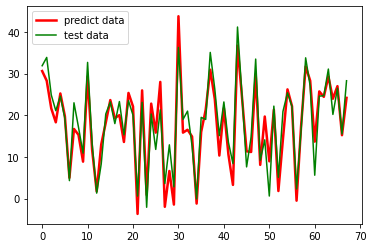

In [18]:
model = LinearRegression()
model.fit(X_train,Y_train)
a= model.intercept_   #截距
b= model.coef_   #回归系数
print('intercept',a,',coef:',b)
print('best: Y=',round(a,2),'+',round(b[0],2),'*X1+',round(b[1],2),'*X2')
Y_pred = model.predict(X_test)
plt.plot(range(len(Y_pred)),Y_pred,'red',linewidth = 2.5,label='predict data')
plt.plot(range(len(Y_test)),Y_test,'green',label='test data')
plt.legend(loc=2)
plt.show()

<IPython.core.display.Javascript object>


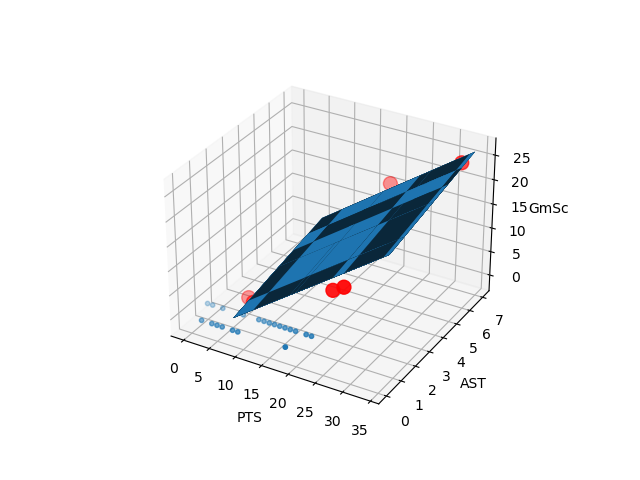

In [19]:
%matplotlib notebook
#使用add_subplot函数来创建3d面
ax = plt.figure().add_subplot(111,projection = '3d')
#描点并设置参数
X_train = np.array(X_train)
Y_train = np.array(Y_train)
ax.scatter(X_train[:,0],X_train[:,1],Y_train,c='r',marker = 'o',s=100) #X_train[:,0]:PTS
                                                                       #X_train[:,1]:AST
x0 = X_train[:,0]
x1 = X_train[:,1]
#使用meshgrid函数生成网格矩阵
x0,x1 = np.meshgrid(x0,x1)
z = model.intercept_ + x0*model.coef_[0]+x1*model.coef_[1]
#画3d图
ax.plot_surface(x0,x1,z)
#设置坐标轴名称
ax.set_xlabel('PTS')
ax.set_ylabel('AST')
ax.set_zlabel('GmSc')
#显示图像
plt.show()

In [20]:
# logistic regression

# the correlation of GmSc and Win or Lose

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.model_selection import cross_val_score,KFold


In [22]:
a=df.loc[(df['Tm']=='LAL')&(df['Opp']=='UTA')&(df['Player']=='Kobe Bryant')]

# Turn the win or lose into 1 or 0

In [23]:
result = a['Result']
numerical_result=result.tolist()

for i in range(len(numerical_result)):
    if numerical_result[i]=='L':
        numerical_result[i]=0
    else:
        numerical_result[i]=1
print (numerical_result)

[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


# Load the data / x as the GmSc ; y as the win or lose

In [24]:
a=df.loc[(df['Tm']=='LAL')&(df['Opp']=='UTA')&(df['Player']=='Kobe Bryant')]
x = a['GmSc']
y = numerical_result 

#  split data and run Logistic Regression


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state=0)
lr = LogisticRegression().fit(np.array(X_train).reshape(-1, 1),Y_train)
Score = lr.score(np.array(X_test).reshape(-1, 1), Y_test)
print("accuracy:",Score)
print("coef:",lr.coef_)

print("intercept:",lr.intercept_)
print(lr.predict_proba(np.array(X_test).reshape(-1, 1))) 

accuracy: 0.7619047619047619
coef: [[0.16874831]]
intercept: [-2.69358418]
[[0.06359656 0.93640344]
 [0.04622162 0.95377838]
 [0.18119847 0.81880153]
 [0.29587784 0.70412216]
 [0.18883095 0.81116905]
 [0.36670389 0.63329611]
 [0.87739252 0.12260748]
 [0.23368361 0.76631639]
 [0.45214395 0.54785605]
 [0.70145322 0.29854678]
 [0.05601527 0.94398473]
 [0.61446179 0.38553821]
 [0.92231405 0.07768595]
 [0.78465001 0.21534999]
 [0.32475456 0.67524544]
 [0.22769427 0.77230573]
 [0.41486597 0.58513403]
 [0.22474049 0.77525951]
 [0.52790473 0.47209527]
 [0.21891488 0.78108512]
 [0.33595291 0.66404709]]


### K-Fold Cross-validation 
### it is like making more times of  spliting  


In [26]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)
scores = cross_val_score(LogisticRegression(), np.array(x).reshape(-1, 1), y, cv=kf)

print("Cross validation scores: {}".format(scores))
print("Mean Cross validation scores: {}".format(scores.mean()))


Cross validation scores: [0.64705882 0.58823529 0.64705882 0.88235294 0.875     ]
Mean Cross validation scores: 0.7279411764705882


# Standardization

##### standardize the x_train and x_test to make sure we can  make the comparation with y directly
###  x =(x - 𝜇)/𝜎


In [27]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x, y, random_state=22)
transfer = StandardScaler()
X_train1 = transfer.fit_transform(np.array(X_train1).reshape(-1, 1))
X_test1 = transfer.fit_transform(np.array(X_test1).reshape(-1, 1))

estimator = LogisticRegression(fit_intercept = True,penalty='l2',solver='lbfgs',tol=0.01)
estimator.fit(X_train1, Y_train1)

y_predict = estimator.predict(X_test1)
print(y_predict)
print(estimator.score(X_test1, Y_test1))
print(Y_test1)






[1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1]
0.7142857142857143
[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]


# Add  CV into the standardization

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x, y, random_state=22)
transfer = StandardScaler()
X_train1 = transfer.fit_transform(np.array(X_train1).reshape(-1, 1))
X_test1 = transfer.fit_transform(np.array(X_test1).reshape(-1, 1))
e =LogisticRegressionCV(fit_intercept = True,penalty='l2', cv=2, solver='lbfgs',tol=0.01)
e.fit(X_train1, Y_train1)
e.score(X_test1, Y_test1)

